In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1: Classification of handwritten digits

In [2]:
'Obtain the MNist dataset'
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y=mnist['data'],mnist['target']
X.shape

(70000, 784)

There are 70,000 images, and each image has 784 features. This is because each image is $28\times 28$ pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black).

Let's take a peek at one digit from the dataset. All we need to do is grab an instance's feature vector, reshape it to a $28\times 28$ array, and display it using imshow()

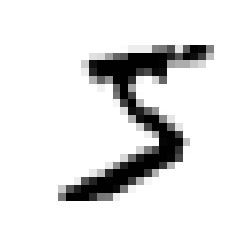

In [3]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

This looks like a 5, and indeed that's what the label tells us

In [4]:
y[0]

'5'

Note that the label is a string. Let's cast $y$ to an integer

In [5]:
y = y.astype(np.uint8)
y = y[:,None] #keep y as a column vector

The following figure shows a few more images from the MNIST dataset

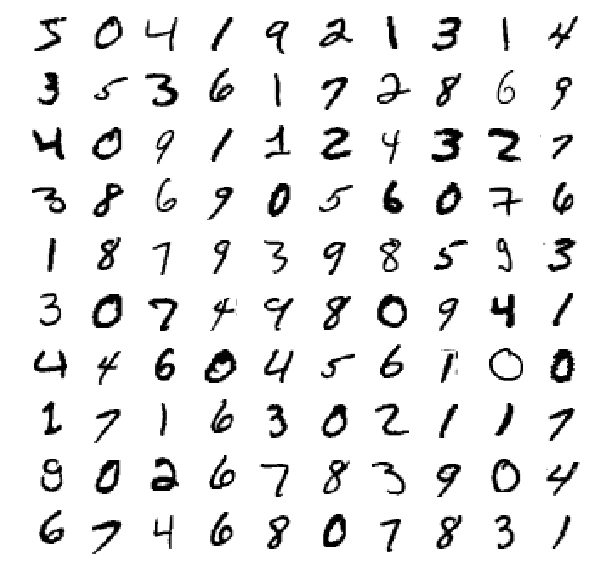

In [6]:
plt.figure(figsize=(10,10))
for i in range(100):
    digit = X[i]
    digit_image = digit.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(digit_image,cmap = 'binary')
    plt.axis('off')

The MNIST dataset is already split into a training set (the first 60000 images) and a test set (the last 10000 images)

In [7]:
X_train,y_train = X[:60000],y[:60000]
X_test,y_test = X[60000:], y[60000:]

## Assignments

The goal is to train a linear model to classify digits as either five or not-five.

**Part 1:** Build (0,1) vectors y_5_train and y_5_test, where their $i$th entries are given by

$$
\left\{ \begin{array}{ll} 1 & \mbox{ if digit $i$ is a five}\\
0 & \mbox{ if digit $i$ is not a five}. \end{array}\right.
$$

In [8]:
y_5 = y.copy()
for i in range(len(y)):
    if y[i] == 5:
        y_5[i] = 1
    else:
        y_5[i] = 0

y_5_train = y_5[:60000]
y_5_test = y_5[60000:]

In [9]:
# X_scaled_train = (X_train-X_train.mean()/X_train.std())
# X_train = X_scaled_train

**Part 2:** Use the training set to train a linear model that predicts the vector y_5_train. Use Stochastic Gradient Descent to train the model.  Use appropriate regularization as needed.

In [10]:
def predictor(y,p):
    n = len(y)
    yy = np.zeros((n,1))
    yy[y>p] = 1
    return yy, n

def check_predicted(X,theta, y, setToLow, setToHigh, cutOff):
    y_pre = X@theta
    y_pc, n = predictor(y_pre, cutOff)
    y_1 = 0 
    y_0 = 0
    for i in range(len(y_pre)):
        if y_pc[i][0] == y[i][0]:
            if y[i][0] == 0:
                y_0 = y_0 + 1
            if y[i][0] == 1:
                y_1 = y_1 + 1
    return [y_pre, y_pc, 
            str(y_1) + " were correctly 1\n" + 
            str(y_0) + " were correctly 0\n" + 
            str((y_1 + y_0) / n * 100) + "% were correct "]

In [11]:
def learning_function(t):
    return s0/(t+s1)

In [12]:
n_iterations = 5000 #number of SGD steps
s0, s1 = 5, 1000 
s = learning_function(0) #learning rate


Random theta: 
 5421 were correctly 1
0 were correctly 0
9.035% were correct 


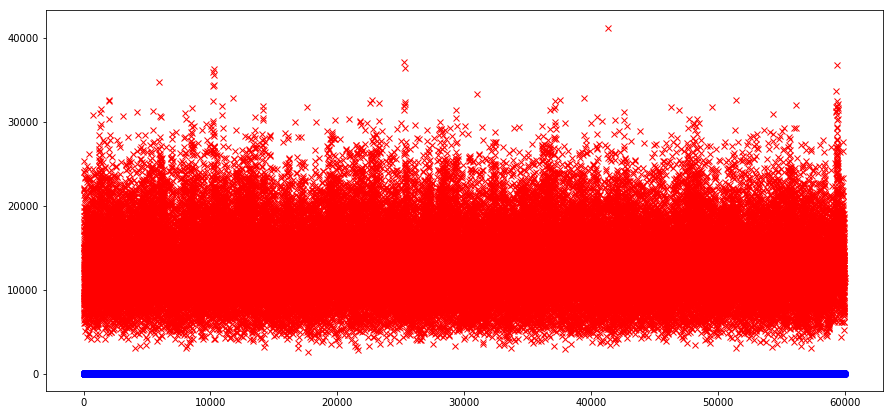

In [15]:
'In a diferent cell'
m,n = X_train.shape
theta = np.random.rand(n,1) #random initialization
MSE = np.zeros((n_iterations,1)) #we will compute the MSE function after each SGD step

ret = check_predicted(X_train,theta, y_5_train, 0, 1, 0.5)
print('Random theta: \n', ret[2])

plt.figure(figsize=(15,7))
plt.plot(y_5_train,'bo')
plt.plot(ret[0],'rx')



2586 were correctly 1
33681 were correctly 0
60.44500000000001% were correct 


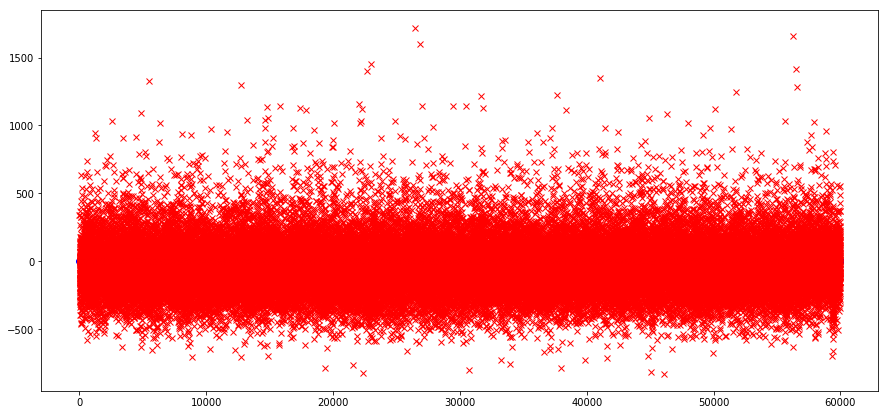

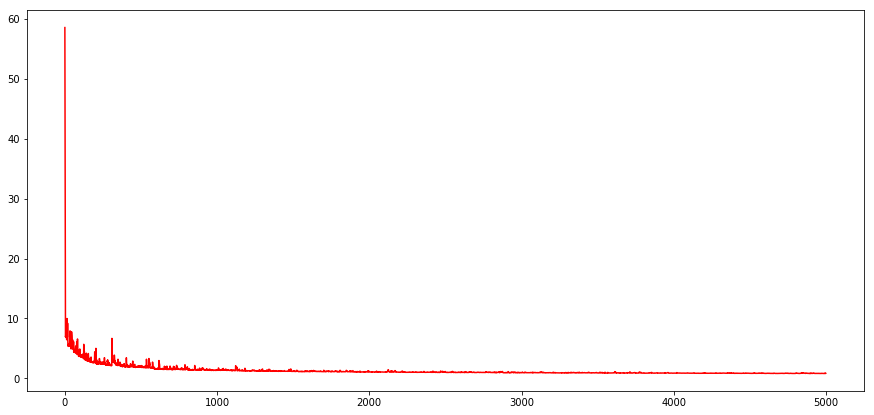

In [16]:
'Stochastic Gradient Descent (SGD)'
for i in range(n_iterations):
    random_row = np.random.randint(m) #pick a random integer in [0,m-1]
    xi = X[None,random_row] #keep xi as a row vector
    yi = y[random_row]
    gradient = (2/m)*xi.T@(xi@theta-yi)
    theta = theta - s*gradient
    s = learning_function(i)
    MSE[i] = np.linalg.norm(y-X@theta)/m

ret = check_predicted(X_train,theta, y_5_train, 0, 1, 0.5)

print(ret[2])

plt.figure(figsize=(15,7))
plt.plot(y_5_train,'bo')
plt.plot(ret[0], 'rx')
# plt.plot(ret[1],'rx')
    
plt.figure(figsize=(15,7))    
plt.plot(MSE,'r-')

**Part 3:**  Use your linear model to classify all the digits in the test set.  Use the rule:

$$
\mbox{classify digit $i$ as a }\left\{ \begin{array}{ll} 
5 & \mbox{ if predicted y_5_test}[i]>0.5 \\
\mbox{not a }5 & \mbox{ if predicted y_5_test}[i]\leq 0.5
\end{array}\right.
$$

How many digits are misclassified? 

# Part 2: an example from Biology

The following dataset contains cancer gene-expression levels (16,063 genes, 144 samples) from *Multiclass cancer diagnosis using tumor gene expression signatures (Golub et all, 2001)*

In [11]:
url1 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.xtrain'
url2 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.xtest'

data_train = pd.read_csv(url1,sep = '\s+',header = None)
data_train = data_train.T

data_test = pd.read_csv(url2,sep = '\s+',header = None)
data_test = data_test.T

data_test.head(10) #show first 10 rows of data_train

,0,1,2,3,4,5,6,7,8,9,...,16053,16054,16055,16056,16057,16058,16059,16060,16061,16062
0,-44.0,-254.0,-166.0,-55.0,-130.0,-133.0,80.0,-62.0,1.0,22.0,...,-51.0,715.0,25.0,47.0,-270.0,-265.0,-290.0,-235.0,-826.0,-262.0
1,-13.0,-124.0,-206.0,-29.0,-117.0,-114.0,111.0,-20.0,-25.0,18.0,...,-57.0,695.0,10.0,57.0,-50.0,-45.0,-61.0,-22.0,-263.0,-52.0
2,-64.3,-184.9,-334.4,-102.2,-289.0,-145.2,-251.9,-150.9,-184.0,179.1,...,-173.4,1324.6,9.8,127.7,244.0,76.5,100.1,-69.6,-1444.3,-121.6
3,-22.0,-169.0,-164.0,-32.0,-49.0,-141.0,0.0,-22.0,16.0,67.0,...,21.0,170.0,20.0,35.0,-275.0,-230.0,-136.0,-228.0,-404.0,-259.0
4,-28.0,-167.0,-158.0,100.0,-129.0,-232.0,148.0,-48.0,14.0,164.0,...,-66.0,1627.0,76.0,119.0,-6.0,68.0,-22.0,27.0,-1088.0,-58.0
5,-94.0,-256.0,-358.0,-174.0,-203.0,-172.0,-477.0,-33.0,-46.0,145.0,...,-69.0,1735.0,95.0,461.0,231.0,211.0,-21.0,34.0,-1233.0,-47.0
6,-59.0,-153.0,-232.0,65.0,-112.0,-388.0,560.0,-204.0,-81.0,242.0,...,-122.0,1576.0,101.0,401.0,510.0,183.0,-62.0,149.0,-1797.0,-34.0
7,-19.0,-42.0,-6.0,-9.0,-62.0,-61.0,-33.0,-49.0,13.0,23.0,...,-63.0,182.0,7.0,235.0,78.0,25.0,0.0,28.0,-425.0,-15.0
8,-24.0,-78.0,-28.0,-17.0,-33.0,-84.0,44.0,-30.0,4.0,-13.0,...,-36.0,119.0,-7.0,41.0,-8.0,0.0,-11.0,17.0,-189.0,-1.0
9,-30.0,-79.0,-18.0,18.0,-31.0,-95.0,90.0,-27.0,19.0,43.0,...,-39.0,429.0,11.0,225.0,-21.0,-35.0,-51.0,-57.0,-392.0,-32.0


Cancer classes are labelled as follows:

1.  breast
2.  prostate
3.  lung
4.  collerectal
5.  lymphoma
6.  bladder
7.  melanoma
8.  uterus
9.  **leukemia**
10. renal
11. pancreas
12. ovary
13. meso
14. cns


In [12]:
url1 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancerlabels.ytrain'
url2 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.ytest'

labels_train = pd.read_csv(url1,sep='\s+',header = None)
labels_train = labels_train.T

labels_test = pd.read_csv(url2,sep='\s+',header = None)
labels_test = labels_test.T

labels_train.head(20)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,2
9,2


## Assignments

The goal is to train a linear model to classify cancers as either leukemia or not-leukemia

**Part 1:** Build (0,1) vectors y_leuk_train and y_leuk_test, where their $i$th entries are given by

$$
\left\{ \begin{array}{ll} 1 & \mbox{ if cancer $i$ is leukemia}\\
0 & \mbox{ if cancer $i$ is not leukemia}. \end{array}\right.
$$

**Part 2:** Use the training set to train a linear model that predicts the vector y_leuk_train. Add 1-norm regularization to your model. How many model coefficients are approximately equal to 0?

**Part 3:**  Use your linear model to classify all the cancers in the test set.  Use the rule:

$$
\mbox{classify cancer $i$ as a }\left\{ \begin{array}{ll} 
\mbox{leukemia} & \mbox{ if predicted y_leuk_test}[i]>0.5 \\
\mbox{not leukemia }5 & \mbox{ if predicted y_leuk_test}[i]\leq 0.5
\end{array}\right.
$$

How many cancers are misclassified? 